# Importing the Usuals

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading the Dataset

In [15]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("krantiswalke/bankfullcsv")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Pushkar Taneja\.cache\kagglehub\datasets\krantiswalke\bankfullcsv\versions\1


In [16]:
dataset = load_dataset(path)
df = dataset['train'].to_pandas()

# Analyzing the Data

In [17]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [19]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Cleaning and Setup

In [20]:
# Step 1: Preview the data
print("Initial Dataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

# Step 2: Handle missing values
df.dropna(inplace=True)

# Step 3: Remove duplicates
df.drop_duplicates(inplace=True)


# Step 4: Detect and handle outliers (e.g., using IQR method for numerical columns)
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Apply to numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    df = remove_outliers_iqr(df, col)


Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

Missing Values:
 age          0
job          0
marital      0
education

In [21]:
num_cols = df.select_dtypes(include='number')
cat_cols = df.select_dtypes(include='object')

# Visualizations

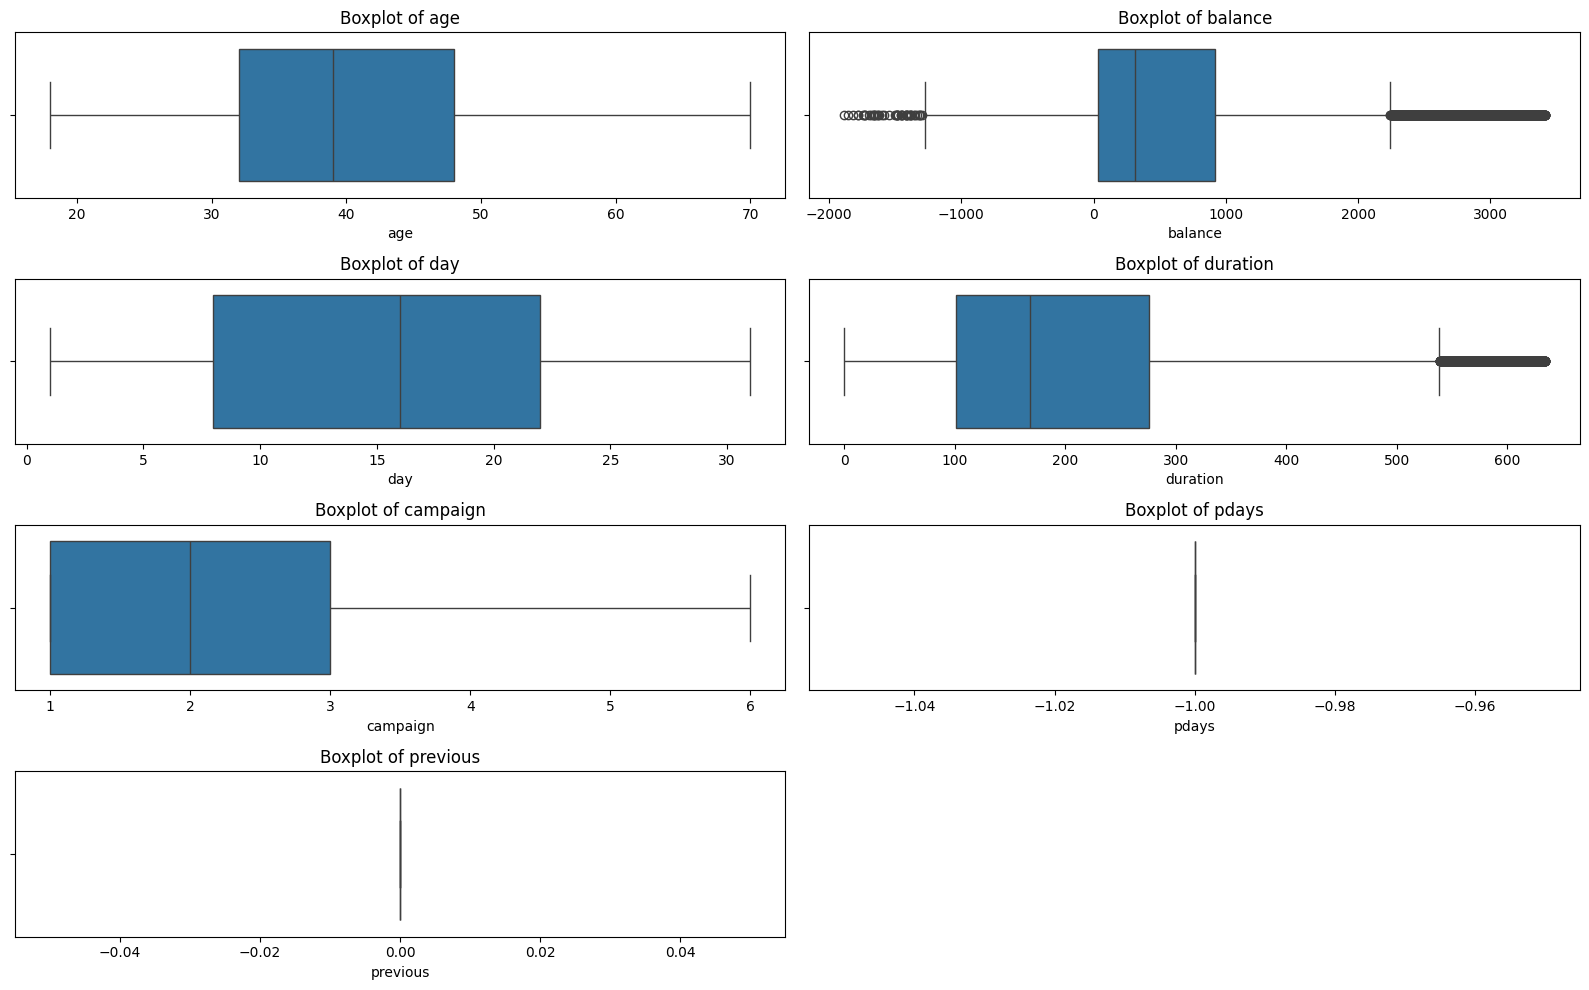

In [22]:
plt.figure(figsize=(16, 10))
for i, column in enumerate(num_cols.columns):
    plt.subplot(len(num_cols.columns)//2 + 1, 2, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

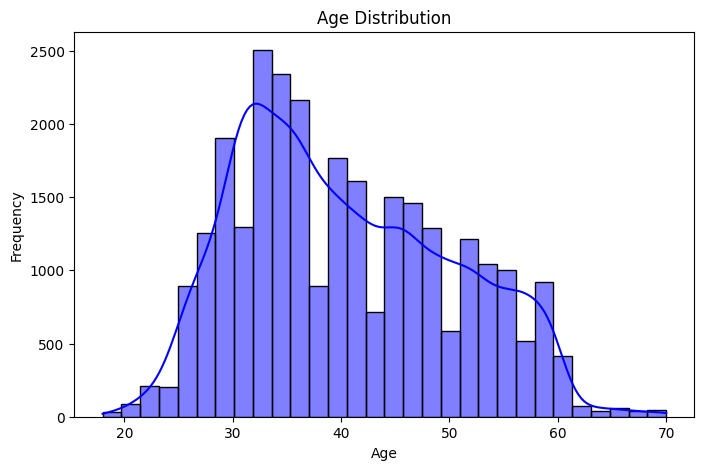

In [23]:
# Distribution plot for 'age'
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


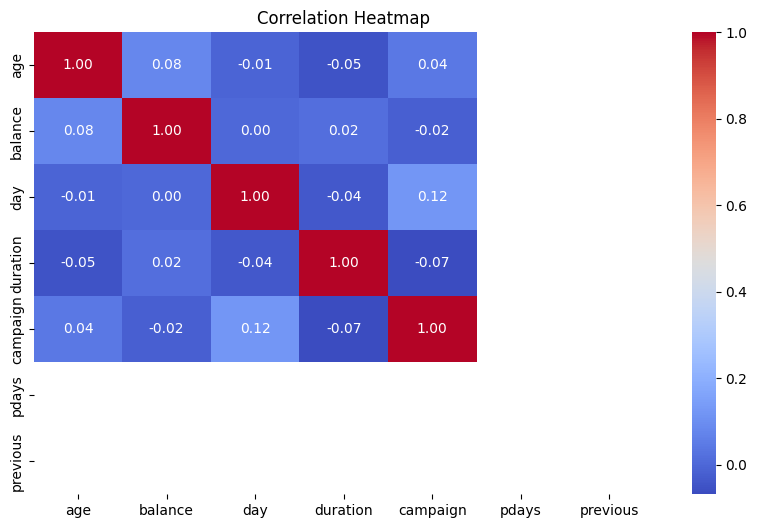

In [24]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation = df.select_dtypes(include='number').corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



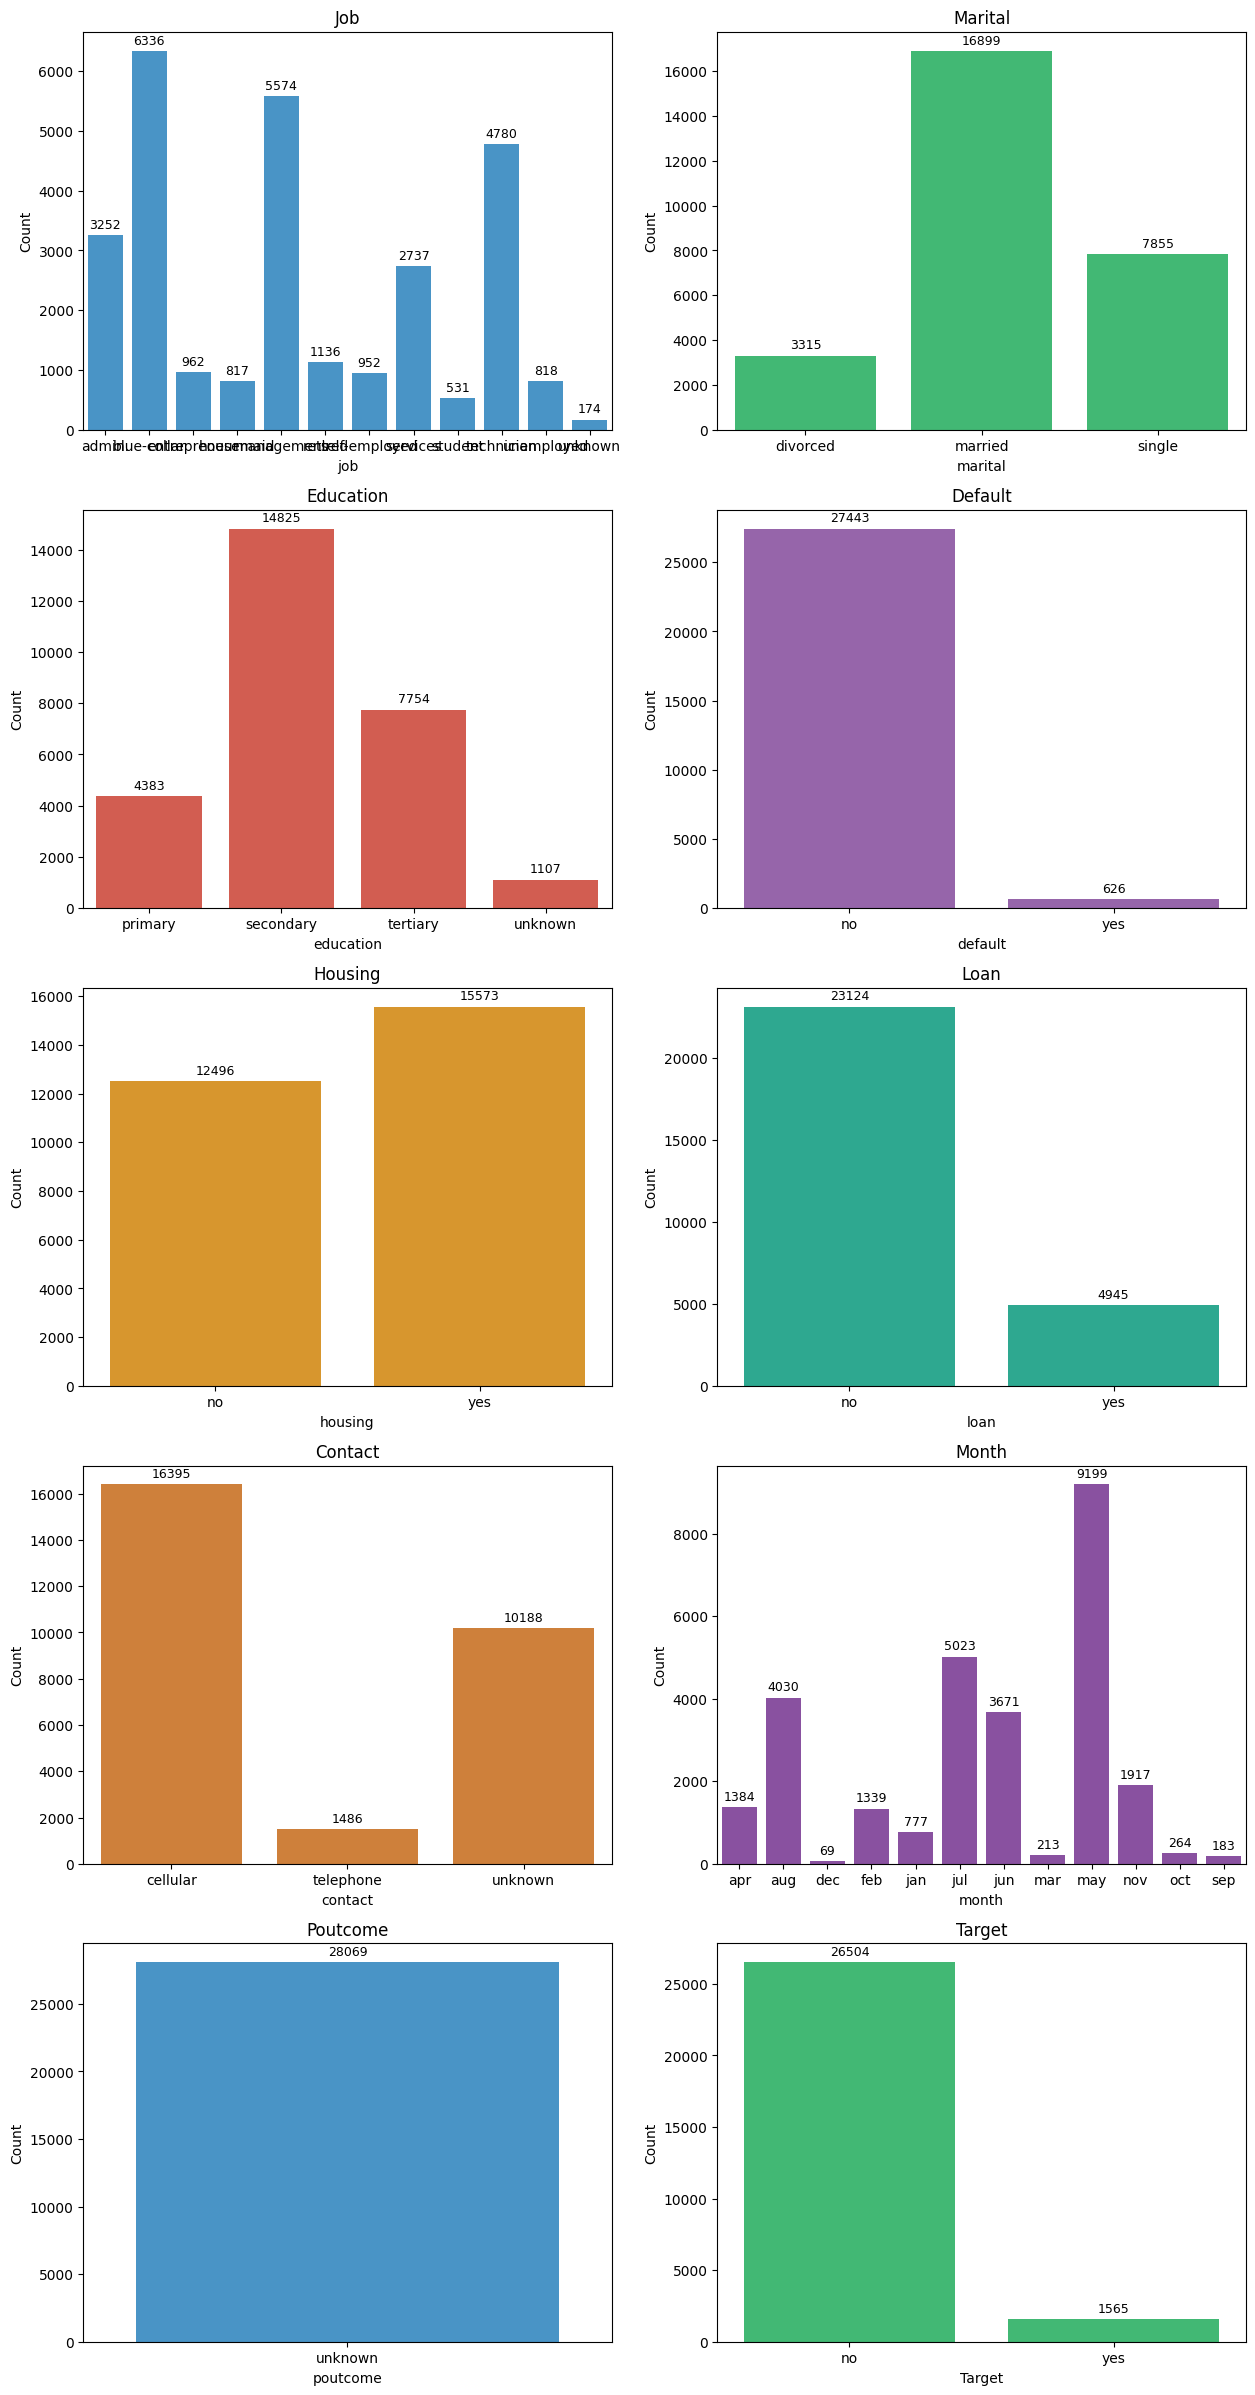

In [25]:
plt.figure(figsize=(15, 30))

# List of colors for the plots
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#f39c12', '#1abc9c', '#e67e22', '#8e44ad']

# Plot each categorical column
for i, column in enumerate(cat_cols.columns):
    counts = df[column].value_counts().sort_index()
    plt.subplot((len(cat_cols.columns) + 1) // 2, 2, i + 1)
    sns.barplot(x=counts.index, y=counts.values, color=colors[i % len(colors)])
    plt.title(column.replace('_', ' ').title())
    plt.xlabel(column)
    plt.ylabel('Count')
    # Annotate counts above each bar
    for j, count in enumerate(counts):
        plt.text(j, count + (max(counts) * 0.01), str(count), ha='center', va='bottom', fontsize=9)
    
        

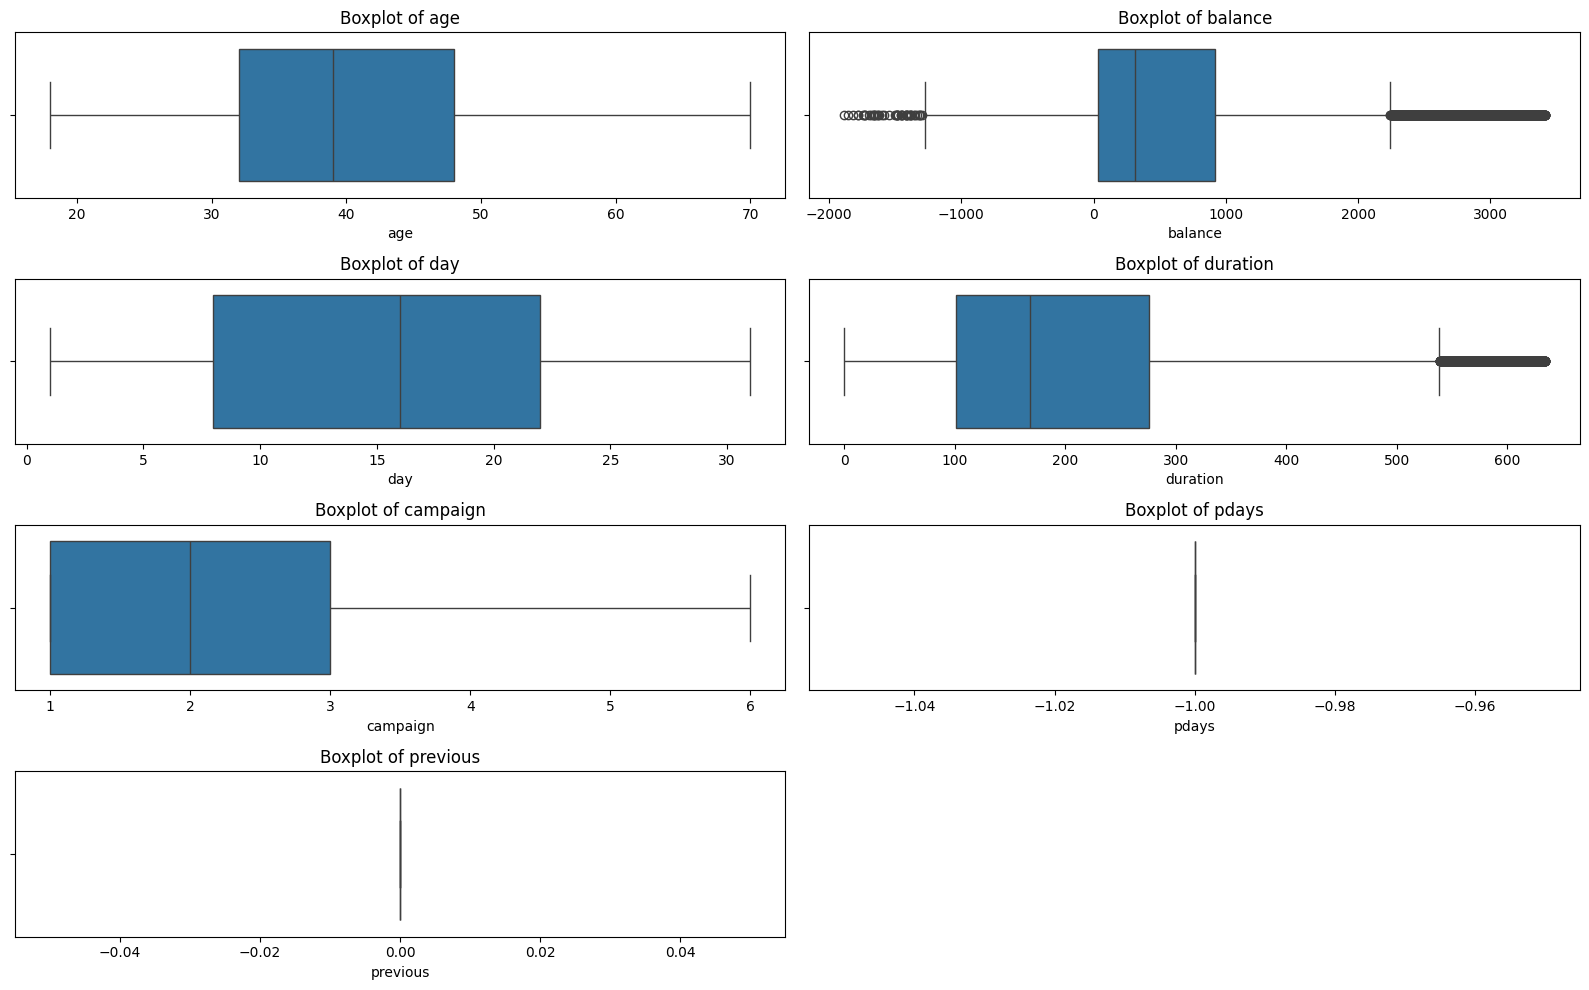

In [26]:
plt.figure(figsize=(16, 10))

# Iterate through each numeric column and create boxplot
for i, column in enumerate(num_cols.columns):
    plt.subplot(len(num_cols.columns)//2 + 1, 2, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

C:\Users\Pushkar Taneja\AppData\Local\Temp\ipykernel_6472\154039739.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=df[column])
C:\Users\Pushkar Taneja\AppData\Local\Temp\ipykernel_6472\154039739.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=df[column])


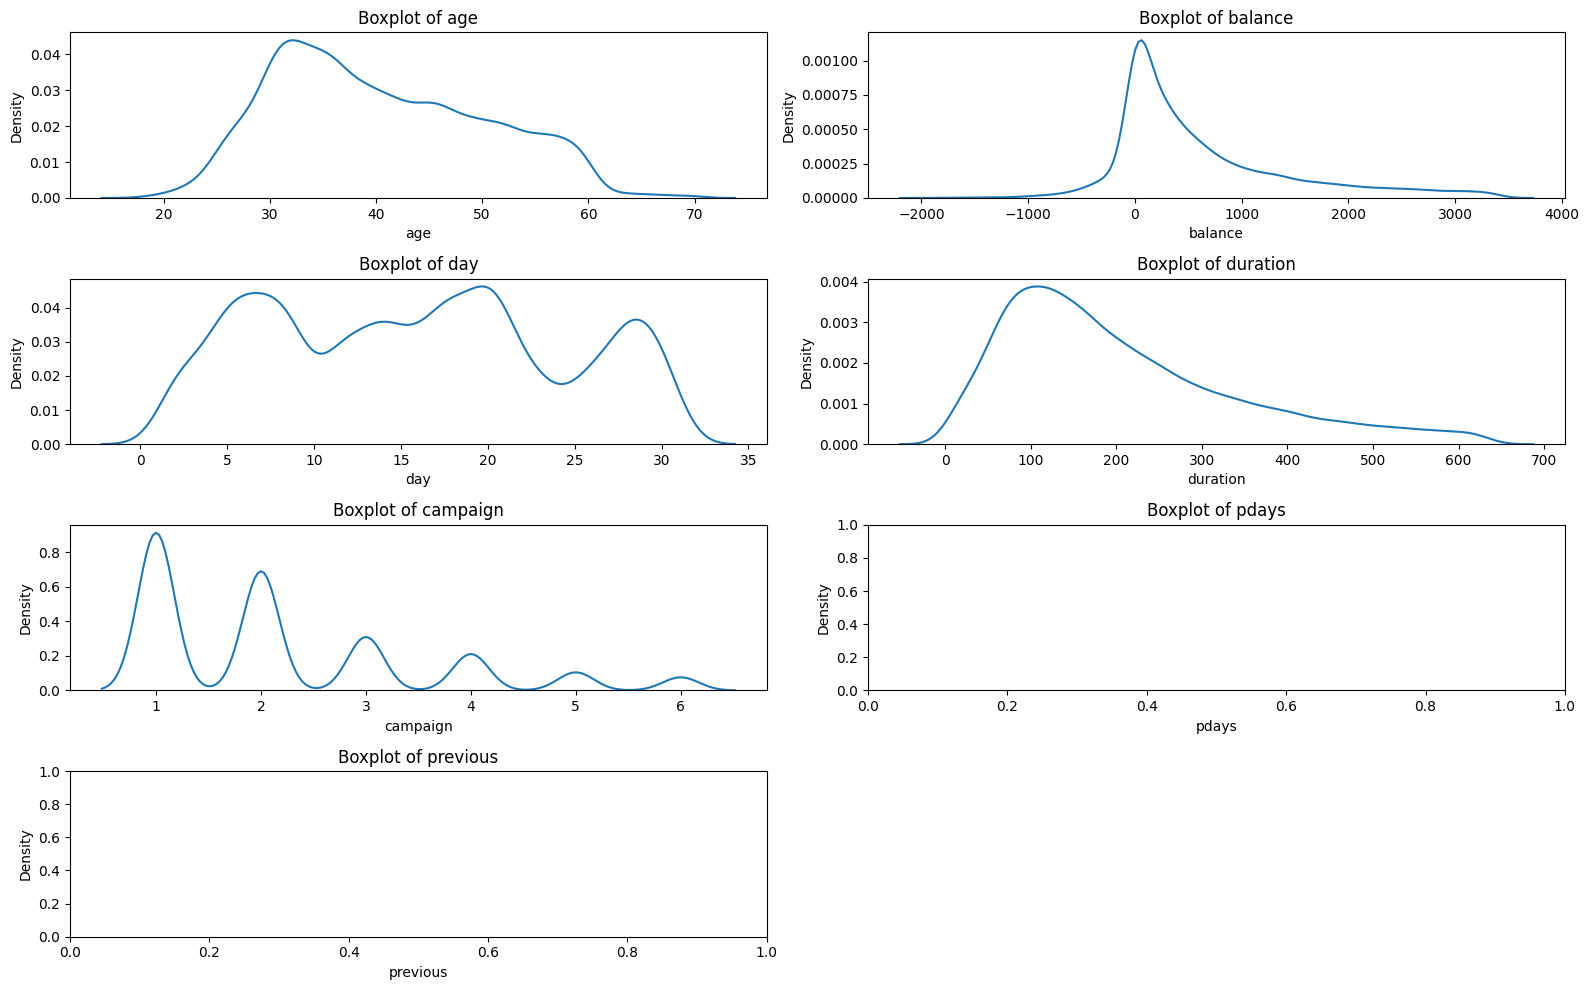

In [27]:
plt.figure(figsize=(16, 10))

# Iterate through each numeric column and create boxplot
for i, column in enumerate(num_cols.columns):
    plt.subplot(len(num_cols.columns)//2 + 1, 2, i + 1)
    sns.kdeplot(x=df[column])
    plt.title(f'Boxplot of {column}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Encode categorical variables

In [28]:
num_cols

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45198,37,1428,16,333,2,-1,0
45202,34,557,17,224,1,-1,0
45203,23,113,17,266,1,-1,0
45205,25,505,17,386,2,-1,0


In [29]:
cat_cols

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45198,management,married,tertiary,no,no,no,cellular,nov,unknown,no
45202,admin.,single,secondary,no,no,no,cellular,nov,unknown,yes
45203,student,single,tertiary,no,no,no,cellular,nov,unknown,yes
45205,technician,single,secondary,no,no,yes,cellular,nov,unknown,yes


In [30]:
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 6: Normalize numerical columns 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Final dataset info
print("\nCleaned Dataset Info:")
print(df.info())
print("\nPreview of Cleaned Data:")
print(df.head())



Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 28069 entries, 0 to 45209
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  28069 non-null  float64
 1   balance              28069 non-null  float64
 2   day                  28069 non-null  float64
 3   duration             28069 non-null  float64
 4   campaign             28069 non-null  float64
 5   pdays                28069 non-null  float64
 6   previous             28069 non-null  float64
 7   job_blue-collar      28069 non-null  bool   
 8   job_entrepreneur     28069 non-null  bool   
 9   job_housemaid        28069 non-null  bool   
 10  job_management       28069 non-null  bool   
 11  job_retired          28069 non-null  bool   
 12  job_self-employed    28069 non-null  bool   
 13  job_services         28069 non-null  bool   
 14  job_student          28069 non-null  bool   
 15  job_technician    

# Model Building

In [31]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer , SimpleImputer 
from sklearn.compose import ColumnTransformer

In [32]:
knn = KNNImputer(missing_values='unknown',add_indicator=True,n_neighbors=10)
si = SimpleImputer(missing_values='unknown',strategy='most_frequent',add_indicator=True)

In [33]:
clf = ColumnTransformer(transformers=[
    ('tf1',knn,['pdays']),
    ('tf2',si,['poutcome','contact'])
],remainder='passthrough')

In [34]:
le = LabelEncoder()
ohe = OneHotEncoder(drop='first',sparse_output=False)
oe = OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary', 'unknown']], unknown_value=4, handle_unknown="use_encoded_value")

In [35]:
clf2 = ColumnTransformer(transformers=[
    ('tf3',ohe,[1,2,3,4,6,8,9,10]),
    ('tf4',oe,['remainder__education'])
],remainder='passthrough')

In [37]:
df['age'] = LabelEncoder().fit_transform(df['age'])  

# One-Hot Encode remaining categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 2: Split features (X) and target (y)
X = df.drop('age', axis=1)  # Drop the target variable
y = df['age']  # Target variable

In [38]:
x_train , x_test , y_train , y_test = train_test_split( X,y,test_size=0.3,random_state=365)

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


scale = StandardScaler()

clf3 = ColumnTransformer(
    transformers=[
        ('scale', scale, x_train.columns)  # Ensure columns are correctly passed
    ],
    remainder='passthrough'  # Pass other columns without transformation
)

# Transform train and test data
x_train_scaled = clf3.fit_transform(x_train)
x_test_scaled = clf3.transform(x_test)

# Convert scaled data back to DataFrame for better handling
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

# Instantiate the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

# Iterate over PCA components
for i in range(1, 17):
    # Apply PCA
    pca = PCA(n_components=i, random_state=42)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)
    
    # Train and predict
    dtc.fit(x_train_pca, y_train)
    y_pred = dtc.predict(x_test_pca)
    
    # Print accuracy
    print(f'Decision Tree Classifier with {i} PCA components: Accuracy = {accuracy_score(y_test, y_pred):.4f}')


Decision Tree Classifier with 1 PCA components: Accuracy = 0.0293
Decision Tree Classifier with 2 PCA components: Accuracy = 0.0365
Decision Tree Classifier with 3 PCA components: Accuracy = 0.0407
Decision Tree Classifier with 4 PCA components: Accuracy = 0.0426
Decision Tree Classifier with 5 PCA components: Accuracy = 0.0439
Decision Tree Classifier with 6 PCA components: Accuracy = 0.0414
Decision Tree Classifier with 7 PCA components: Accuracy = 0.0410
Decision Tree Classifier with 8 PCA components: Accuracy = 0.0391
Decision Tree Classifier with 9 PCA components: Accuracy = 0.0413
Decision Tree Classifier with 10 PCA components: Accuracy = 0.0433
Decision Tree Classifier with 11 PCA components: Accuracy = 0.0454
Decision Tree Classifier with 12 PCA components: Accuracy = 0.0448
Decision Tree Classifier with 13 PCA components: Accuracy = 0.0442
Decision Tree Classifier with 14 PCA components: Accuracy = 0.0438
Decision Tree Classifier with 15 PCA components: Accuracy = 0.0426
Deci